In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras import Sequential
from keras.utils import to_categorical
import cv2
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization
# read image path
import pathlib

import imageio
import matplotlib.image as img

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# read data path 
data_path=pathlib.Path("D:\mohamed Orabi\Rice\Rice_Image_Dataset")

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_6576\2638949579.py:2: SyntaxWarning: invalid escape sequence '\m'
  data_path=pathlib.Path("D:\mohamed Orabi\Rice\Rice_Image_Dataset")


In [3]:
# read 5 folder in data path
arbori = list(data_path.glob('Arborio/*'))
basmati = list(data_path.glob('Basmati/*'))
ipsala = list(data_path.glob('Ipsala/*'))
jasmine = list(data_path.glob('Jasmine/*'))
karacadag = list(data_path.glob('Karacadag/*'))

In [4]:
# dictonary of folder name
data = {
    'arbori':arbori,
    'basmati':basmati,
    'ipsala':ipsala,
    'jasmine':jasmine,
    'karacadag':karacadag
}

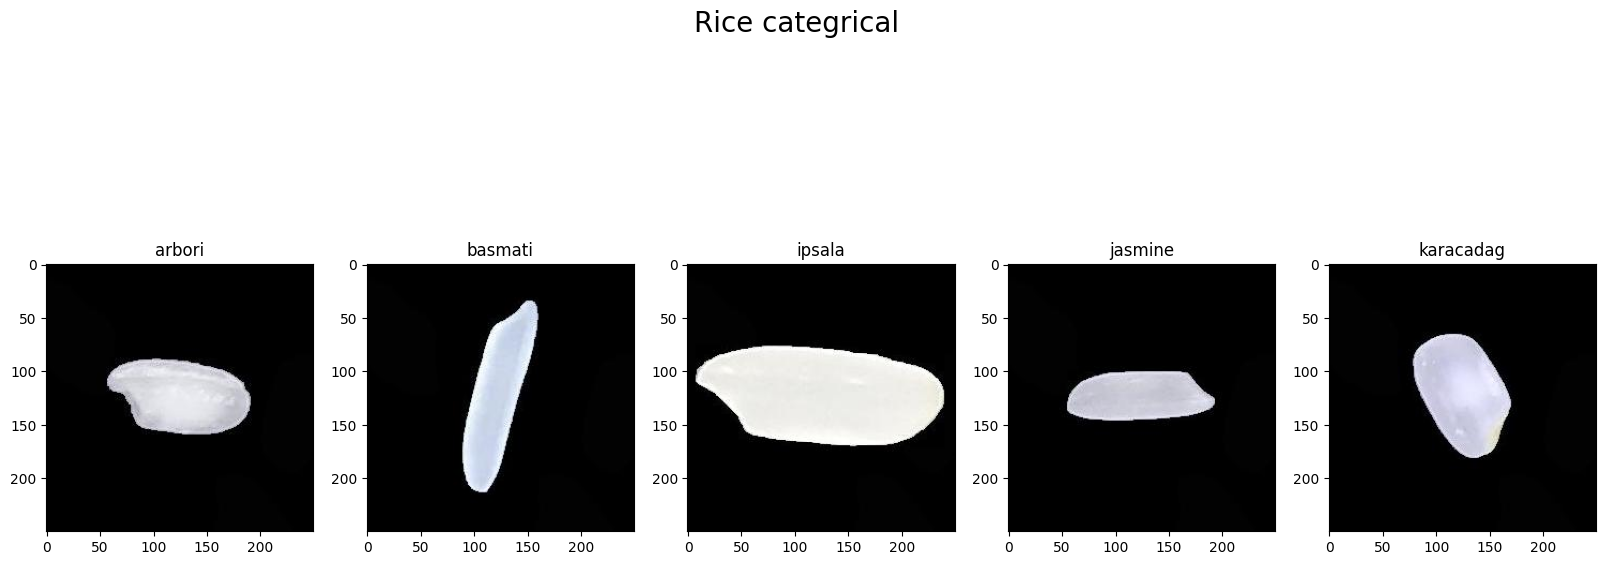

In [5]:
fig,ax=plt.subplots(ncols=5,figsize=(20,8))
fig.suptitle("Rice categrical",fontsize=20)

# read image from each class 
img_arbori=img.imread(arbori[0])
img_basmati=img.imread(basmati[0])
img_ipsala=img.imread(ipsala[0])
img_jasmine=img.imread(jasmine[0])
img_karacadag=img.imread(karacadag[0])

# get name for each image 
for index,name in enumerate(list(data.keys())):
    ax[index].set_title(name)

# show image 
ax[0].imshow(img_arbori)
ax[1].imshow(img_basmati)
ax[2].imshow(img_ipsala)
ax[3].imshow(img_jasmine)
ax[4].imshow(img_karacadag)

plt.show()

In [6]:
# scaling data--> image *1/255 , test_size=20%
data_generator=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
# Applay data generator on train 
train_data=data_generator.flow_from_directory('D:\mohamed Orabi\Rice\Rice_Image_Dataset',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=True,
                                            subset='training')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_6576\3414916391.py:2: SyntaxWarning: invalid escape sequence '\m'
  train_data=data_generator.flow_from_directory('D:\mohamed Orabi\Rice\Rice_Image_Dataset',


Found 60000 images belonging to 5 classes.


In [8]:
# Applay data generator on test

test_data=data_generator.flow_from_directory('D:\mohamed Orabi\Rice\Rice_Image_Dataset',
                                            target_size=(224,224),
                                            batch_size=1,
                                            class_mode='categorical',
                                            shuffle=True,
                                            subset='validation'
                                            )       

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_6576\394275839.py:3: SyntaxWarning: invalid escape sequence '\m'
  test_data=data_generator.flow_from_directory('D:\mohamed Orabi\Rice\Rice_Image_Dataset',


Found 15000 images belonging to 5 classes.


In [9]:
model=Sequential()

In [10]:
# input layer --> faltten layer

model.add(Flatten())

# Hidden layer 
model.add(Dense(265,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))

# output layer 
model.add(Dense(5,activation='softmax'))

In [11]:
# model compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
# model fit 
hist=model.fit(train_data, validation_data=test_data, epochs=1)

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 339s 180ms/step - accuracy: 0.8848 - loss: 0.4149 - val_accuracy: 0.9714 - val_loss: 0.0838


In [16]:
# predict model
y_pred=model.predict(test_data)
y_pred

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step


array([[7.9077703e-04, 1.5501663e-04, 3.3076282e-07, 9.9905366e-01,
        2.1965849e-07],
       [3.2193630e-13, 9.6011126e-01, 3.2577022e-10, 3.9888788e-02,
        1.6619577e-11],
       [1.2213214e-03, 3.9638314e-12, 1.4545874e-06, 1.1678171e-07,
        9.9877709e-01],
       ...,
       [8.7967849e-01, 9.0245250e-10, 3.0059857e-06, 3.6268221e-07,
        1.2031813e-01],
       [4.7709898e-04, 1.9048263e-11, 4.5161901e-06, 3.9103548e-07,
        9.9951804e-01],
       [2.6180678e-06, 7.8658938e-02, 3.4508317e-05, 9.2130375e-01,
        1.7251995e-07]], dtype=float32)

In [17]:
ypred=np.argmax(y_pred,axis=1)
ypred

array([3, 1, 4, ..., 0, 4, 3], dtype=int64)

In [18]:
# Evaluate Train set
train_loss,train_acc=model.evaluate(train_data)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9705 - loss: 0.0919


In [19]:
# Evaluate Test set
test_loss,test_acc=model.evaluate(test_data)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 128s 9ms/step - accuracy: 0.9717 - loss: 0.0833
